# COSC 411 Final Exam (Fall 2023)

## Part II Machine Learning Algorithms & Applications

Date & Time: Tuesday, December 19, 2023 from 10:45 a.m.-1:15 p.m.

To finish this exam, please download the Jupyter Notebook file from the exam instructions. You have 150 minutes to finish Part I (on paper) & Part II (in Jupyter Notebook).

This is an open-book exam. You may use the lecture notes, textbook, and online tutorials. However, you are NOT allowed to search any related example code and/or solution from any internet sources.

Note: As to the part II, you need to **copy and paste your source code in the Answer Area after each question on MyClasses**. In addition, you also need to **upload this Jupyter Notebook file (".ipynb") with all your source code and test results** to the last task of this exam on MyClasses.

In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np


## Question 1 (40 points):

Please use the "breast cancer dataset" included in the scikit-learn library to conduct the following classfication tasks. 

Task 1 (10 points): Randomly split this dataset into two parts: 70% for training and 30% for testing. Use SVM classification algorithm to conduct experiments, find out appropriate parameters, and obtains the highest testing accuracy. Then show the results using **Classification Report** and draw the confusion matrix (in a figure);


In [2]:
dataset = datasets.load_breast_cancer()
X = dataset['data']
y = dataset['target']
df = pd.DataFrame(X, columns=dataset.feature_names)
df['target'] = pd.Series(dataset.target)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [3]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline

Xtrain, Xtest, ytrain, ytest = train_test_split(X,y, test_size=.3)

pca = RandomizedPCA(n_components=32, whiten=True, random_state=42)
svc = SVC(kernel='linear', class_weight='balanced') # changing to linear increased the accuracy to 94% 
model = make_pipeline(pca, svc)
svc.fit(Xtrain, ytrain)

SVC(class_weight='balanced', kernel='linear')

In [4]:
svc.score(Xtest, ytest)

0.9590643274853801

In [36]:
y_pred = svc.predict(Xtest)
print(classification_report(ytest, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94        63
           1       0.98      0.94      0.96       108

    accuracy                           0.95       171
   macro avg       0.95      0.96      0.95       171
weighted avg       0.95      0.95      0.95       171



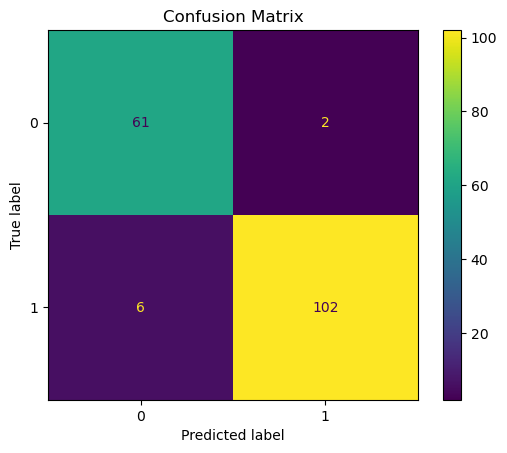

In [37]:
cm = confusion_matrix(ytest, y_pred)
display = ConfusionMatrixDisplay(confusion_matrix=cm)
display.plot(cmap='viridis') 
plt.title("Confusion Matrix")
plt.show()

Task 2 (10 points): Split the dataset into training dataset (70%) and testing dataset (30%), train an AdaBoost classifier using DT as base classifier, conduct independent-test classification to show the accuracy (using classification report) and corresponding confusion matrix (in a figure)

In [38]:
from sklearn.ensemble import AdaBoostClassifier

Xtrain, Xtest, ytrain, ytest = train_test_split(X,y, test_size=.3)

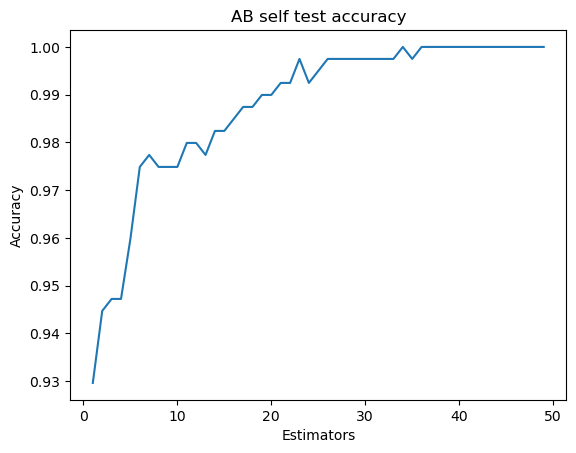

In [25]:
depth = np.arange(1, 50)
accuracy = np.empty(len(depth))

# any higher range will take forever to process (for my computer at least)

for i, k, in enumerate(depth):
    ab = AdaBoostClassifier(estimator=None, # default is DT
                        n_estimators=k, 
                        learning_rate=.5, 
                        random_state=None)
    ab.fit(Xtrain, ytrain)
    accuracy[i] = ab.score(Xtrain, ytrain)
    
plt.title('AB self test accuracy')
plt.plot(depth, accuracy)
plt.xlabel('Estimators')
plt.ylabel('Accuracy')
plt.show()

In [39]:
ab = AdaBoostClassifier(estimator=None, # default is DT
                        n_estimators=35, 
                        learning_rate=.5, 
                        random_state=None)

In [40]:
ab.fit(Xtrain, ytrain)
ab.score(Xtest, ytest)

0.935672514619883

In [41]:
y_pred = svc.predict(Xtest)
print(classification_report(ytest, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95        58
           1       0.99      0.96      0.97       113

    accuracy                           0.96       171
   macro avg       0.96      0.97      0.96       171
weighted avg       0.97      0.96      0.97       171



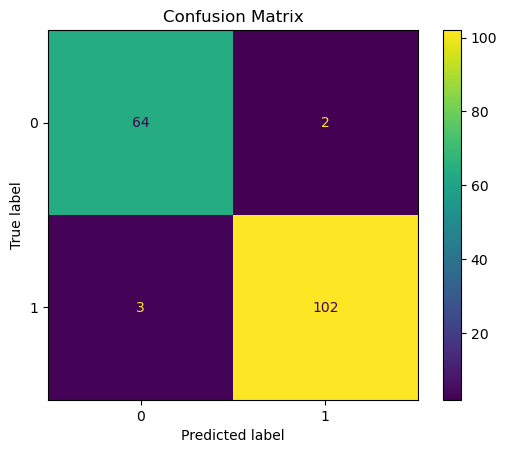

In [31]:
cm = confusion_matrix(ytest, y_pred)
display = ConfusionMatrixDisplay(confusion_matrix=cm)
display.plot(cmap='viridis') 
plt.title("Confusion Matrix")
plt.show()

Task 3 (10 points): Split the dataset into training dataset (70%) and testing dataset (30%), train a bagging classifier using an ensemble of 10 base classifiers (use SVM as base classifier), conduct independent-test classification to show the accuracy (using classification report) and corresponding confusion matrix (in a figure)

In [43]:
from sklearn.ensemble import BaggingClassifier
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y, test_size=.3)

bc = BaggingClassifier(svc, 
                       n_estimators=10,
                        max_samples=0.75,
                        max_features=0.75,
                        bootstrap=True,
                        bootstrap_features=True,
                        oob_score=True,
                        warm_start=False,
                        n_jobs=-1,
                        random_state=0
                      )

In [44]:
bc.fit(Xtrain, ytrain)

C:\Users\CSAdmin\anaconda3\Lib\site-packages\sklearn\ensemble\_bagging.py:789: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
C:\Users\CSAdmin\anaconda3\Lib\site-packages\sklearn\ensemble\_bagging.py:795: RuntimeWarning: invalid value encountered in divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]


BaggingClassifier(bootstrap_features=True,
                  estimator=SVC(class_weight='balanced', kernel='linear'),
                  max_features=0.75, max_samples=0.75, n_jobs=-1,
                  oob_score=True, random_state=0)

In [45]:
bc.score(Xtest, ytest)

0.9532163742690059

In [46]:
y_pred = svc.predict(Xtest)
print(classification_report(ytest, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95        71
           1       0.97      0.96      0.96       100

    accuracy                           0.96       171
   macro avg       0.96      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



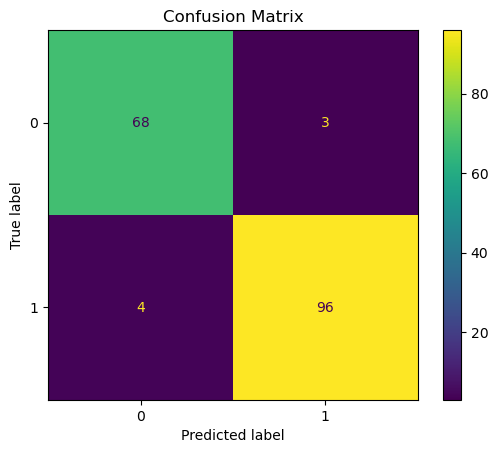

In [47]:
cm = confusion_matrix(ytest, y_pred)
display = ConfusionMatrixDisplay(confusion_matrix=cm)
display.plot(cmap='viridis') 
plt.title("Confusion Matrix")
plt.show()

Task 4 (10 points): Use the WHOLE dataset and Decision Tree (DT) classification algorithm, conduct a **cross-validation test (CVT) (fold = 10)**, show the CVT accuracy and corresponding confusion matrix (in a figure). Observe the confusion matrix, explain where most misclassifications are located.

In [49]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth = 3, random_state = 0)
dt.fit(X, y)
dt.score(X, y)

0.9789103690685413

In [51]:
from sklearn.model_selection import cross_val_score, KFold
k = 10
kf = KFold(n_splits=k, random_state=None)
result = cross_val_score(dt, X, y, cv = kf) # raw data

print("Avg accuracy: {}".format(result.mean()))

Avg accuracy: 0.9279448621553886


In [52]:
y_pred = dt.predict(X)

In [53]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       212
           1       0.98      0.99      0.98       357

    accuracy                           0.98       569
   macro avg       0.98      0.98      0.98       569
weighted avg       0.98      0.98      0.98       569



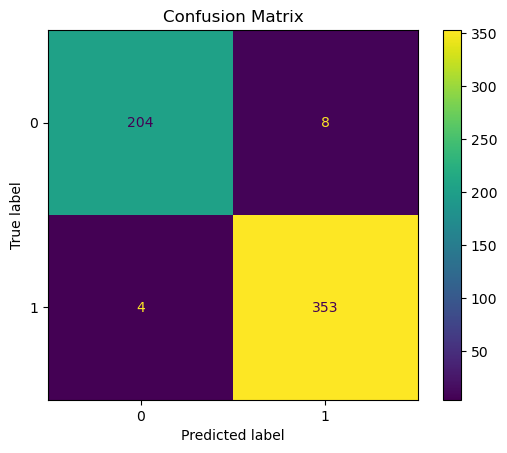

In [55]:
cm = confusion_matrix(y, y_pred)
display = ConfusionMatrixDisplay(confusion_matrix=cm)
display.plot(cmap='viridis') 
plt.title("Confusion Matrix")
plt.show()

### Question 2 (10 points):

Please use the "Iris Dataset" included in the scikit-learn library to conduct the following clustering tasks. The **first 4 columns** of this dataset are attributes, and the last column (labels) is the ground truth. 

Tasks: If we only use **3 columns of this dataset (any 3 columns out of the first 4 columns)** as attributes to conduct k-means clustering (k = 3, each cluster is a type of iris plant), 1) indicate which **3 columns (i.e. 3 features)** can obtain the highest clustering accuracy; 2) based on this clustering results (using 3 features & with highest accuracy), 
- output the corresponding center of each cluster; 
- output the clustering accuracy (i.e. out of all samples, how many samples are correctly identified); 
- show the corresponding confusion matrix in a figure

In [57]:
%matplotlib inline
from sklearn import datasets
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import seaborn as sns; sns.set()  # for plot styling
import matplotlib.pyplot as plt
from scipy.stats import mode
import numpy as np
import pandas as pd 

In [59]:
dataset = datasets.load_iris()
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
X = dataset['data']
y = dataset['target']
# print(dataset.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [60]:
kmeans = KMeans(n_clusters=3)
# kmeans.fit(X)
# y_kmeans = kmeans.predict(X)

clusters = kmeans.fit_predict(X)
kmeans.cluster_centers_.shape

C:\Users\CSAdmin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\CSAdmin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


(3, 4)

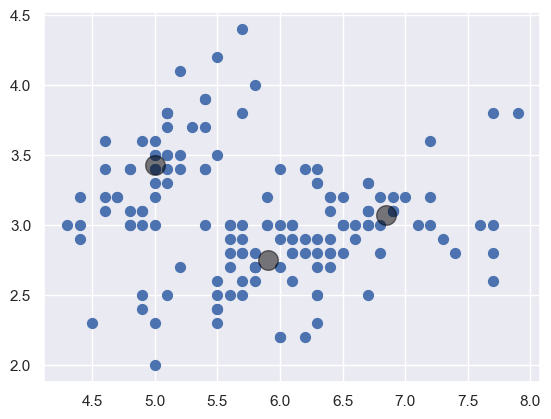

In [61]:
plt.scatter(X[:,0],X[:,1], s = 50)
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c ='black', s=200, alpha=0.5)

In [62]:
labels = np.zeros_like(clusters)
for i in range(3): # 3 clusters
    mask = (clusters == i)
    labels[mask] = mode(y[mask])[0]

In [63]:
accuracy_score(y, labels)

0.8933333333333333

In [64]:
y_pred = kmeans.predict(X)

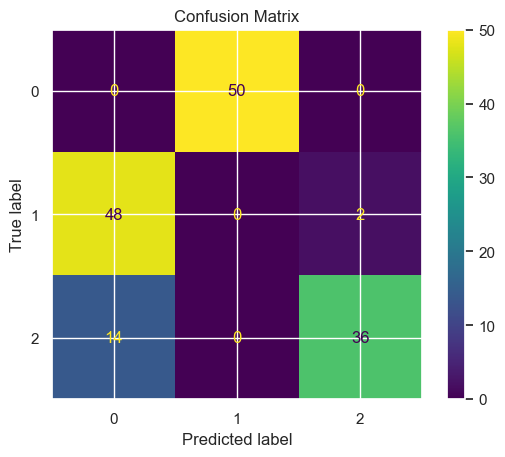

In [66]:
cm = confusion_matrix(y, y_pred)
display = ConfusionMatrixDisplay(confusion_matrix=cm)
display.plot(cmap='viridis') 
plt.title("Confusion Matrix")
plt.show()